### Additional tests for section 4

In [2]:
# packages
%matplotlib inline
import matplotlib.pyplot as plt
import scipy as sp
import numpy as np
from scipy import signal, fft
from scipy.optimize import brentq


In [11]:
# external function files
import functions, filters_func
import utils
from functions import signals_ex, amplitude_sampler, amp_smp
from filters_func import perform, FIR_class, filters_plot, filters_plot_fourier


In [4]:
%load_ext autoreload
%autoreload 2

In [5]:
q = functions.quantizer(5)
T = 1
xlim = 0
k = 200

#### Sawtooth

In [6]:
def sawtooth_test(x):
    f0 = 3 # Hz
    return 0.8* signal.sawtooth(2 * np.pi * f0 * x, 0.7)

In [7]:
x= np.linspace(0,1,1000)
q_test, _ = amp_smp(sawtooth_test, T, q, xlim, k, plot= False)
x_smp= x[::2]
q_test_smp = q_test[::2]

In [15]:
f = FIR_class(taps =8, delay = 16)
y= f.movingAvg(x,q_test)
y_smp= f.movingAvg(x_smp, q_test_smp)

(1.7757402168434757+1.0309595753844913j)
(3.66729347049974+1.0893866312471407j)


MSE - Moving average filter =  0.4509262804240057
SNR - Moving average filter =  9.682870131098346
MSE - Moving average - smp filter =  0.6308213395406133
SNR - Moving average - smp filter =  6.193862965957574


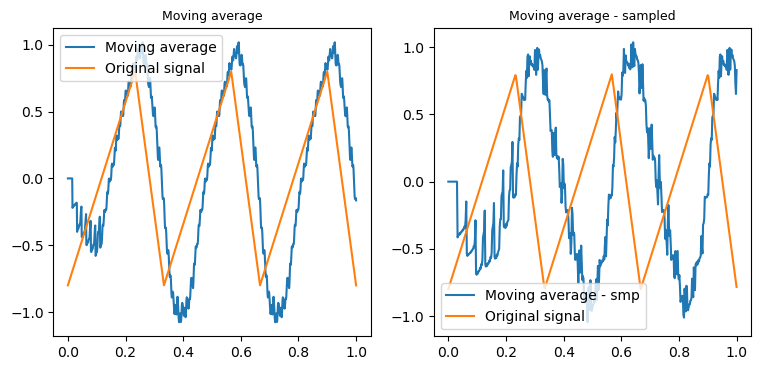

In [16]:
filters_plot('Moving average', x, y,x_smp,y_smp, sawtooth_test(x), sawtooth_test(x_smp))

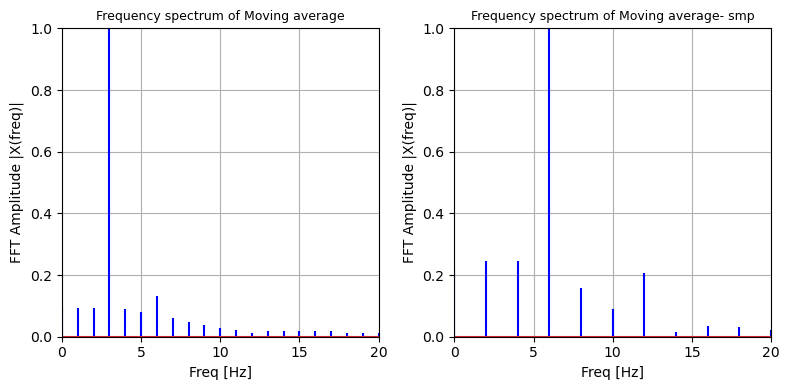

In [17]:
freq_FS, X_FS = utils.fourier_analysis(y, fsmp = 1000)
freq_FS_smp, X_FS_smp = utils.fourier_analysis(y_smp, fsmp = 1000)
#---------------------------------------------------------------------
filters_plot_fourier(freq_FS, X_FS, freq_FS_smp, X_FS_smp, 20, 'Moving average')

(0.3182175584817247+0.2553494787847193j)
(0.39665356896624926+0.37083261127176825j)
MSE - Hamming filter filter =  0.38652552476902524
SNR - Hamming filter filter =  10.89306131132439
MSE - Hamming filter - smp filter =  0.5005474019561781
SNR - Hamming filter - smp filter =  6.952649837556782


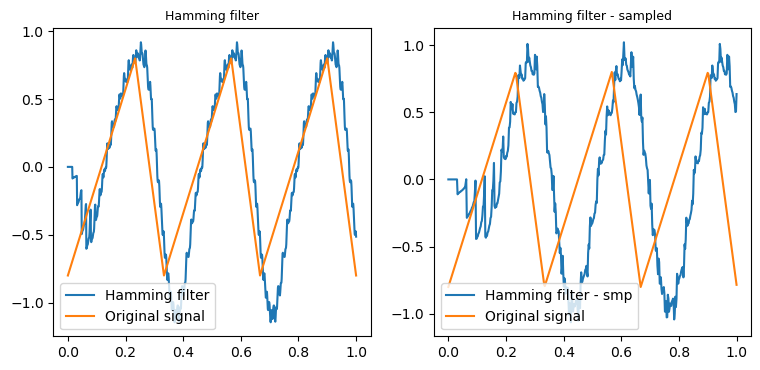

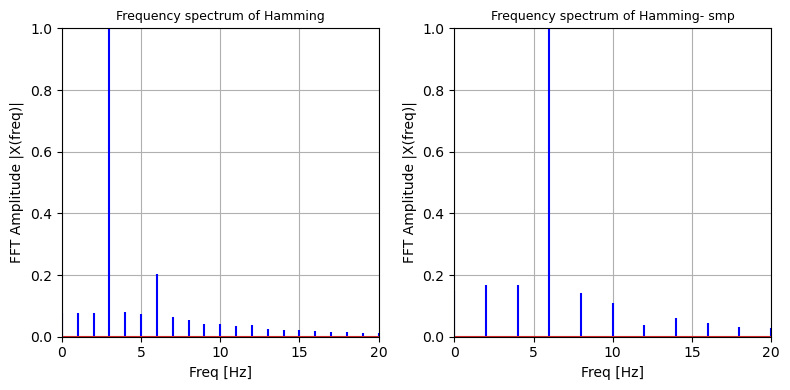

In [18]:
f = FIR_class(taps =8, delay = 16)
y= f.hamming(x,q_test)
y_smp= f.hamming(x_smp, q_test_smp)
filters_plot('Hamming filter', x, y,x_smp,y_smp, sawtooth_test(x), sawtooth_test(x_smp))
#--------------------------------------------------------------
freq_FS, X_FS = utils.fourier_analysis(y, fsmp = 1000)
freq_FS_smp, X_FS_smp = utils.fourier_analysis(y_smp, fsmp = 1000)
filters_plot_fourier(freq_FS, X_FS, freq_FS_smp, X_FS_smp, 20, 'Hamming')

(0.4099428057081238+0.3152727942624527j)
(0.5157876556246999+0.44887638798580076j)
MSE - Bartlett filter =  0.39083569116433436
SNR - Bartlett filter =  11.034486214508812
MSE - Bartlett - smp filter =  0.49641120700017116
SNR - Bartlett - smp filter =  7.074657076718676


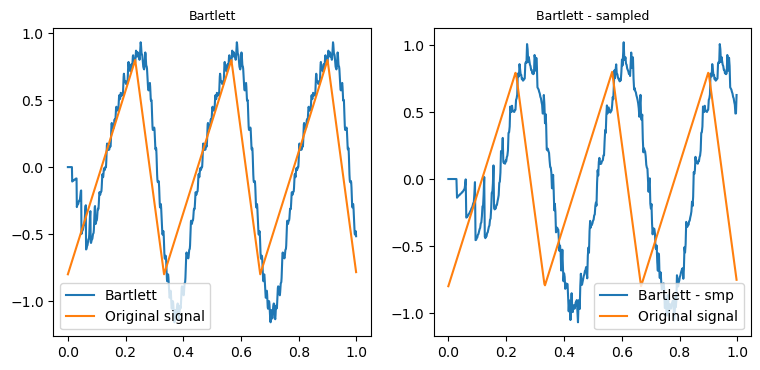

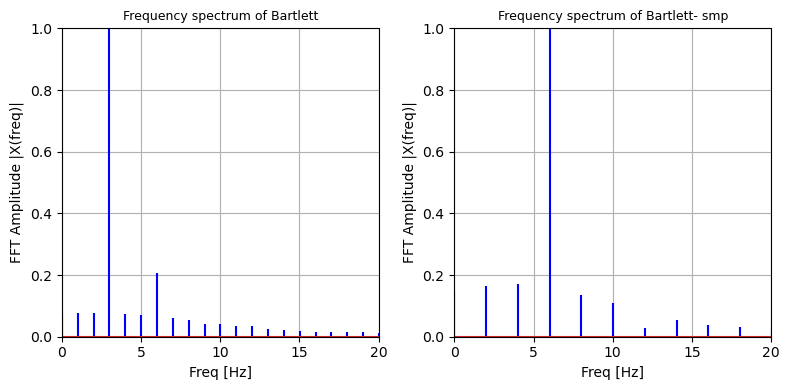

In [20]:
f = FIR_class(taps =8, delay = 16)
y= f.bartlett(x,q_test)
y_smp= f.bartlett(x_smp, q_test_smp)
filters_plot('Bartlett', x[:-1], y,x_smp[:-1],y_smp, sawtooth_test(x)[:-1], sawtooth_test(x_smp)[:-1])
#--------------------------------------------------------------
freq_FS, X_FS = utils.fourier_analysis(y, fsmp = 1000)
freq_FS_smp, X_FS_smp = utils.fourier_analysis(y_smp, fsmp = 1000)
filters_plot_fourier(freq_FS, X_FS, freq_FS_smp, X_FS_smp, 20, 'Bartlett')

### Polynomial

In [28]:
def poly_spline3(x,y):
    spline = CubicSpline(x, y) # Create the cubic spline
    x_range = np.linspace(min(x), max(x), 1000) #spline x range
    y_range = spline(x_range)
    return x_range, y_range

In [50]:
import random
from scipy.interpolate import CubicSpline

x =  np.sort(random.sample(range(1, 20), 10))
y = np.array([random.random() for _ in range(10)])
x_range, y_range = poly_spline3(x,y)

#Normalize
y_range /= y_range.max()
y /= y.max()

# sample data points
x_smp = x_range[::3]
y_smp_og = y_range[::3]
y_smp_og /= y_smp_og.max() # normalize to [-1,1]


In [51]:
q_test = q.quantize(y_range)
q_test_smp = q.quantize(y_smp_og)

1.5517241379310345
1.8000000000000003
MSE - Moving average filter =  0.12328806248195046
SNR - Moving average filter =  4.673924172329556
MSE - Moving average - smp filter =  0.16243423889587907
SNR - Moving average - smp filter =  3.47392877972462


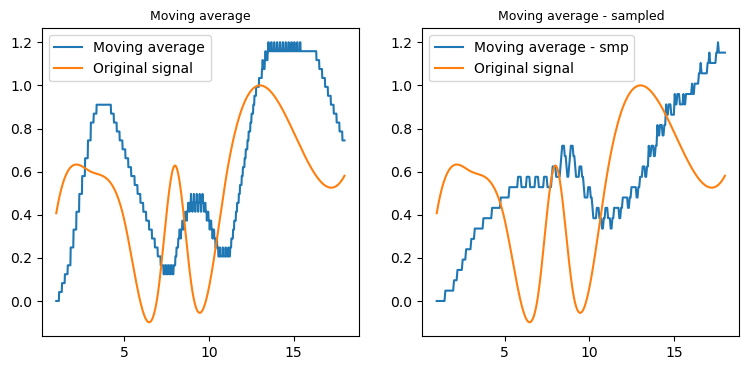

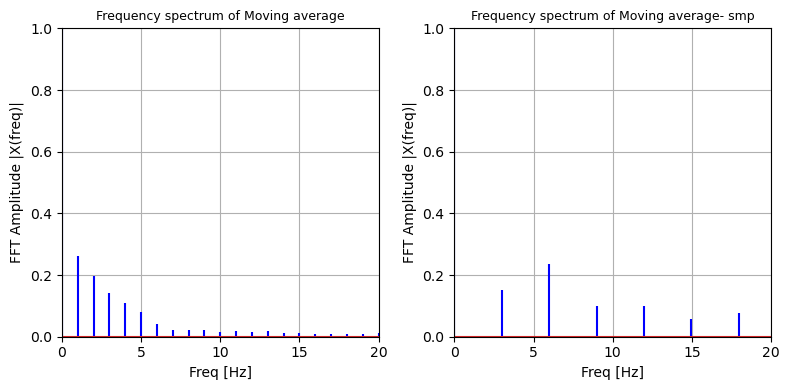

In [53]:
f = FIR_class(taps = 15, delay = 10)
y= f.movingAvg(x_range,q_test)
y_smp= f.movingAvg(x_smp, q_test_smp)
filters_plot('Moving average', x_range, y,x_smp,y_smp, y_range, y_smp_og)
#--------------------------------------------------------------
freq_FS, X_FS = utils.fourier_analysis(y, fsmp = 1000)
freq_FS_smp, X_FS_smp = utils.fourier_analysis(y_smp, fsmp = 1000)
filters_plot_fourier(freq_FS, X_FS, freq_FS_smp, X_FS_smp, 20, 'Moving average')

0.35234237354010606
0.35568431098984304
MSE - Hamming filter filter =  0.10613745141239403
SNR - Hamming filter filter =  5.324447896902599
MSE - Hamming filter - smp filter =  0.18358045296030057
SNR - Hamming filter - smp filter =  2.9424401872400283


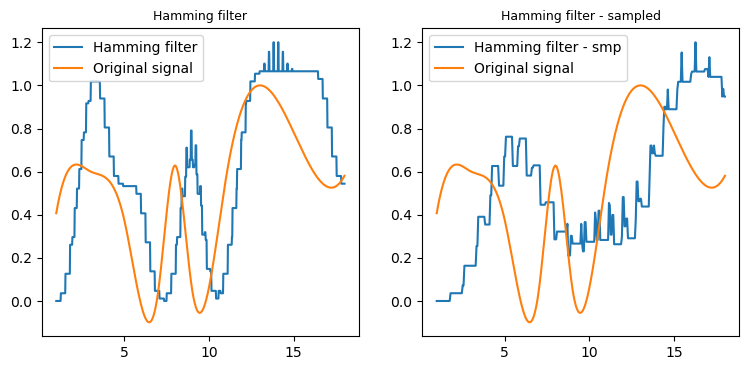

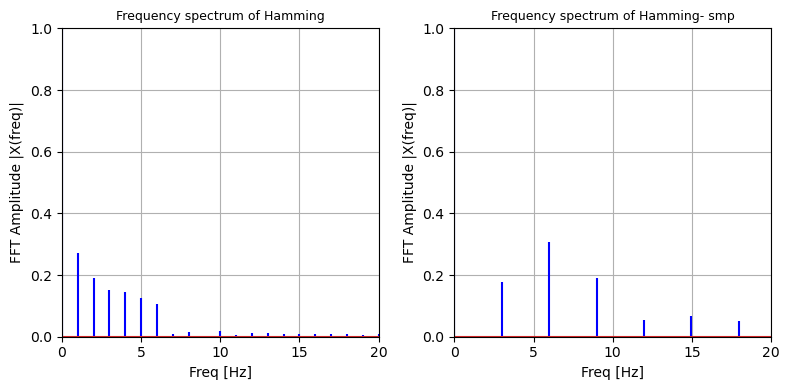

In [54]:
f = FIR_class(taps =8, delay = 16)
y= f.hamming(x_range,q_test)
y_smp= f.hamming(x_smp, q_test_smp)
filters_plot('Hamming filter', x_range, y,x_smp,y_smp, y_range, y_smp_og)
#--------------------------------------------------------------
freq_FS, X_FS = utils.fourier_analysis(y, fsmp = 1000)
freq_FS_smp, X_FS_smp = utils.fourier_analysis(y_smp, fsmp = 1000)
filters_plot_fourier(freq_FS, X_FS, freq_FS_smp, X_FS_smp, 20, 'Hamming')

0.4444444444444444
0.4444444444444444
MSE - Bartlett filter filter =  0.10252124399597176
SNR - Bartlett filter filter =  5.47528848414424
MSE - Bartlett filter - smp filter =  0.17730246440465008
SNR - Bartlett filter - smp filter =  3.0944280998416227


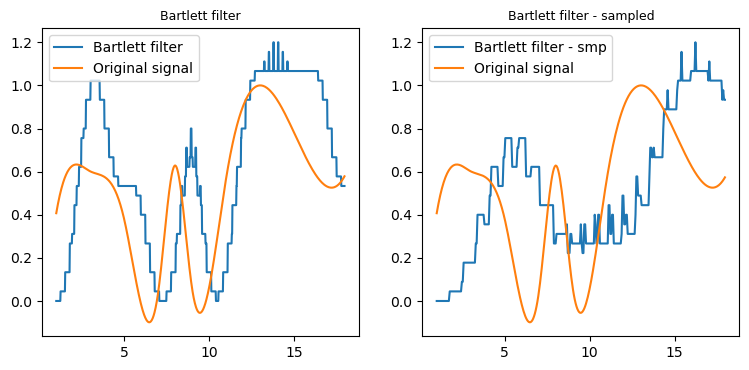

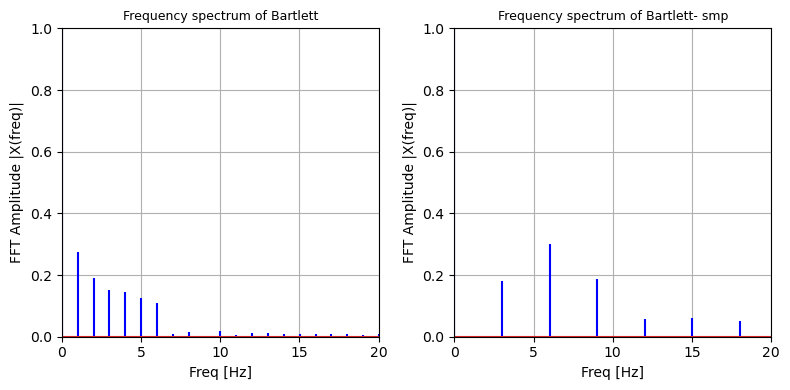

In [55]:
f = FIR_class(taps =8, delay = 16)
y= f.bartlett(x_range,q_test)
y_smp= f.bartlett(x_smp, q_test_smp)
filters_plot('Bartlett filter', x_range[:-1], y,x_smp[:-1],y_smp, y_range[:-1], y_smp_og[:-1])
#--------------------------------------------------------------
freq_FS, X_FS = utils.fourier_analysis(y, fsmp = 1000)
freq_FS_smp, X_FS_smp = utils.fourier_analysis(y_smp, fsmp = 1000)
filters_plot_fourier(freq_FS, X_FS, freq_FS_smp, X_FS_smp, 20, 'Bartlett')